<a href="https://colab.research.google.com/github/2303A52254/AIML/blob/main/Assignment_5(AIML).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Mounted at /content/drive
Data Types:
PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

Summary Statistics:
       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
90%     802.000000    1.000000    3.000000   50.000000    1.000000   
max     891.000000   

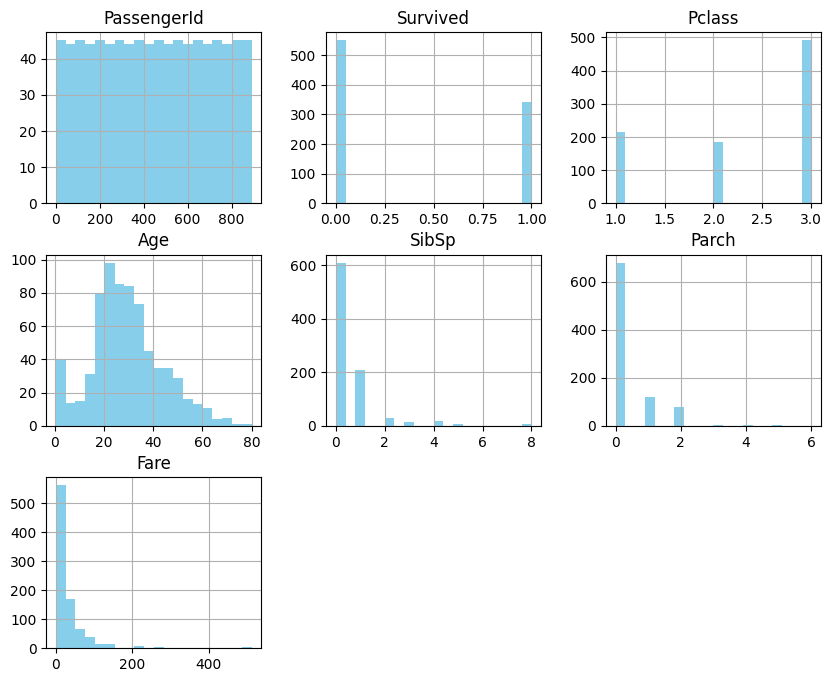

<ipython-input-1-a4b3a0ff9467>:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Survived', palette=['#FF69B4', '#32CD32'])  # Pink and green


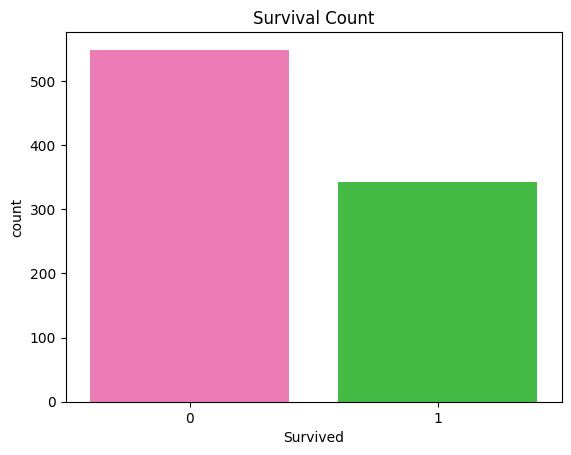

<ipython-input-1-a4b3a0ff9467>:34: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x='Sex', y='Survived', palette=['#6495ED', '#FFC0CB'])  # Blue and pink


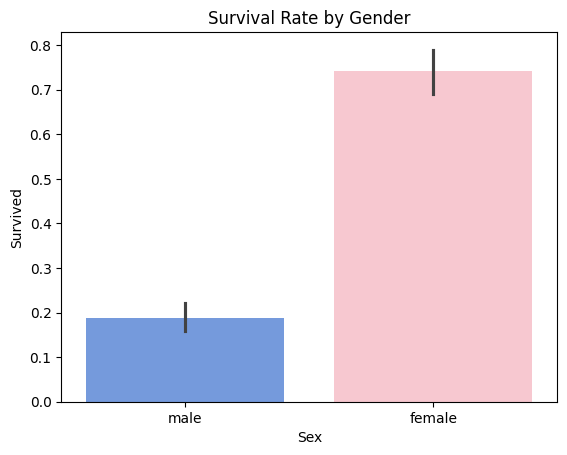

<ipython-input-1-a4b3a0ff9467>:39: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x='Pclass', y='Survived', palette=['#008000', '#FFD700', '#4169E1'])  # Green, yellow, and blue


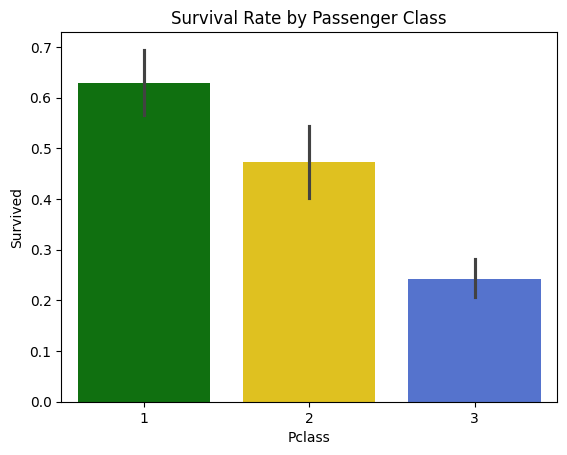

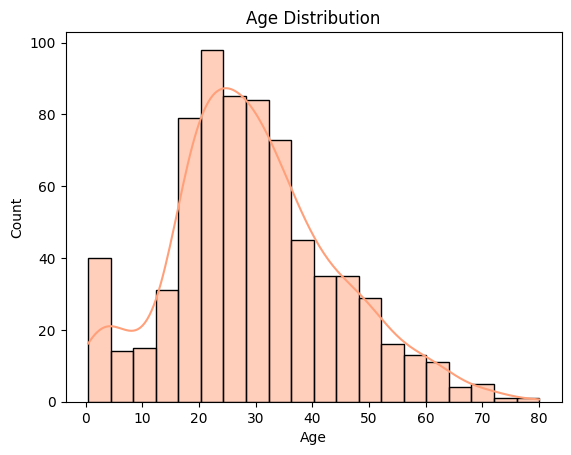

<ipython-input-1-a4b3a0ff9467>:49: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Pclass', y='Age', palette=['#6495ED', '#FFC0CB', '#008000'])  # Blue, pink, and green


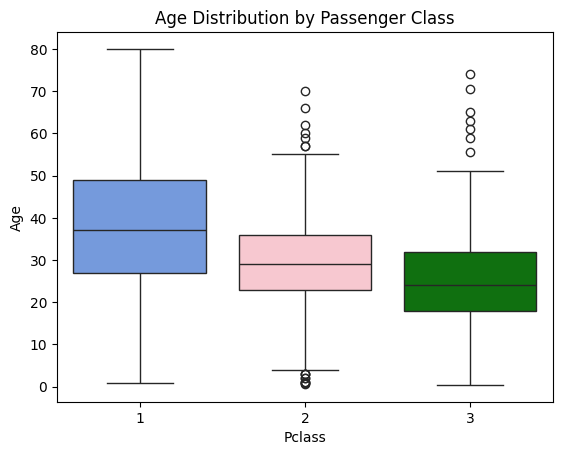

   Survived  Pclass  Sex   Age  SibSp  Parch     Fare  Embarked
0         0       3    0  22.0      1      0   7.2500         0
1         1       1    1  38.0      1      0  71.2833         1
2         1       3    1  26.0      0      0   7.9250         0
3         1       1    1  35.0      1      0  53.1000         0
4         0       3    0  35.0      0      0   8.0500         0
F1 Score (default penalty): 0.7552447552447553


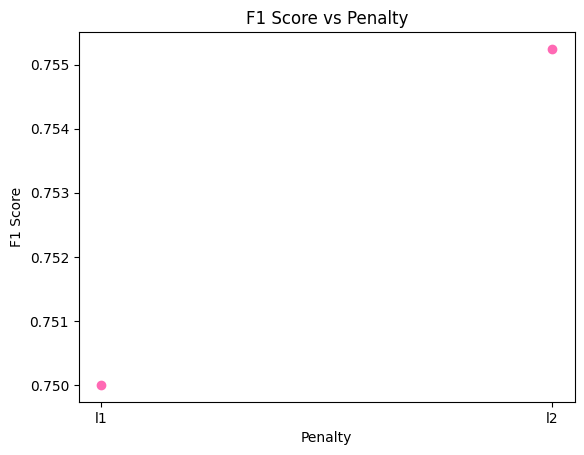

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score

# Mount Google Drive and load the Titanic dataset
from google.colab import drive
drive.mount('/content/drive')
file_path = '/content/titanic_train.csv'
df = pd.read_csv(file_path)

# Create a function to perform exploratory data analysis
def explore_data(df):
    print("Data Types:")
    print(df.dtypes)
    print("\nSummary Statistics:")
    print(df.describe(percentiles=[0.25, 0.5, 0.75, 0.9]))
    print("\nColumn Names:")
    print(df.columns)

    # Plot numeric features
    df.hist(bins=20, figsize=(10, 8), color='#87CEEB')  # Light blue
    plt.show()

    # Plot relative size of survived/non-survived
    sns.countplot(data=df, x='Survived', palette=['#FF69B4', '#32CD32'])  # Pink and green
    plt.title('Survival Count')
    plt.show()

    # Plot survival rate by gender
    sns.barplot(data=df, x='Sex', y='Survived', palette=['#6495ED', '#FFC0CB'])  # Blue and pink
    plt.title('Survival Rate by Gender')
    plt.show()

    # Plot survival rate by passenger class
    sns.barplot(data=df, x='Pclass', y='Survived', palette=['#008000', '#FFD700', '#4169E1'])  # Green, yellow, and blue
    plt.title('Survival Rate by Passenger Class')
    plt.show()

    # Plot age distribution
    sns.histplot(data=df, x='Age', kde=True, color='#FFA07A')  # Light orange
    plt.title('Age Distribution')
    plt.show()

    # Box plot of class-wise age distribution
    sns.boxplot(data=df, x='Pclass', y='Age', palette=['#6495ED', '#FFC0CB', '#008000'])  # Blue, pink, and green
    plt.title('Age Distribution by Passenger Class')
    plt.show()

explore_data(df)

# Perform data wrangling
def wrangle_data(df):
    # Impute missing Age values with the median
    df['Age'].fillna(df['Age'].median(), inplace=True)

    # Drop unnecessary columns
    df.drop(columns=['PassengerId', 'Name', 'Ticket', 'Cabin'], inplace=True)

    # Recode categorical features
    df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})
    df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)  # Fill missing embarked values
    df['Embarked'] = df['Embarked'].map({'S': 0, 'C': 1, 'Q': 2})

    return df

df = wrangle_data(df)
print(df.head())

# Split the data into X and Y
X = df.drop(columns=['Survived'])
Y = df['Survived']

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Define a function to train a logistic regression model
def train_logistic_model(X_train, y_train, penalty='l2'):
    model = LogisticRegression(penalty=penalty, solver='liblinear', max_iter=1000)
    model.fit(X_train, y_train)
    return model

# Train a logistic regression model with default penalty
logistic_model = train_logistic_model(X_train, y_train)
y_pred = logistic_model.predict(X_test)
f1 = f1_score(y_test, y_pred)
print(f"F1 Score (default penalty): {f1}")

# Compute F1 score as a function of penalty and visualize
penalties = ['l1', 'l2']
f1_scores = []
for penalty in penalties:
    model = train_logistic_model(X_train, y_train, penalty=penalty)
    y_pred = model.predict(X_test)
    f1_scores.append(f1_score(y_test, y_pred))

# Scatter plot of F1 score for different penalties
plt.scatter(penalties, f1_scores, color='#FF69B4')  # Pink
plt.title('F1 Score vs Penalty')
plt.xlabel('Penalty')
plt.ylabel('F1 Score')
plt.show()